In [1]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.3 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 3.7/390.3 MB 12.1 MB/s eta 0:00:32
    --------------------------------------- 7.1/390.3 MB 14.1 MB/s eta 0:00:28
   - -------------------------------------- 12.3/390.3 MB 16.8 MB/s eta 0:00:23
   - -------------------------------------- 14.9/390.3 MB 16.5 MB/s eta 0:00:23
   -- ------------------------------------- 20.2/390.3 MB 17.5 MB/s eta 0:00:22
   -- ------------------------------------- 24.1/390.3 MB 18.0 MB/s eta 0:00:21
   -- ------------------------------------- 26.2/390.3 MB 16.9 MB/s eta 0:00:22
   -- ------------------------------------- 28.6/390.3 MB 16.5 MB/s eta 0:00:22
   --- ------------------------------------ 32.5/390.3 MB 16.5 MB/s eta 0:00:22
   --- ------------------------------------ 35.9/390.3 MB 16.5 MB/s eta 0:00:22
   ---- ----------------------------------- 40.1/390.

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15420115264737247845
 xla_global_id: -1]

In [5]:
!cat /proc/meminfo

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!cat /proc/cpuinfo

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!pip install -q keras

In [23]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [25]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [26]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [43]:
X.shape

(10000, 11)

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [32]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [33]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['acc'])

In [35]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6123 - loss: 0.7694 - val_acc: 0.7565 - val_loss: 0.5865
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7830 - loss: 0.5650 - val_acc: 0.7910 - val_loss: 0.5370
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7954 - loss: 0.5311 - val_acc: 0.7921 - val_loss: 0.5131
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7921 - loss: 0.5092 - val_acc: 0.7921 - val_loss: 0.4972
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7967 - loss: 0.4906 - val_acc: 0.7929 - val_loss: 0.4852
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8037 - loss: 0.4646 - val_acc: 0.7933 - val_loss: 0.4761
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8079 - loss: 0.4554 - val_acc: 0.7944 - val_loss: 0.4692
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8066 - loss: 0.4520 - val_acc: 0.7978 - val_loss: 0.4636
Epoch 9/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


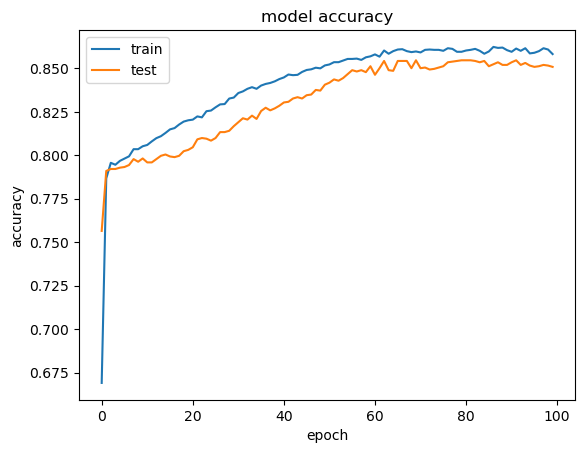

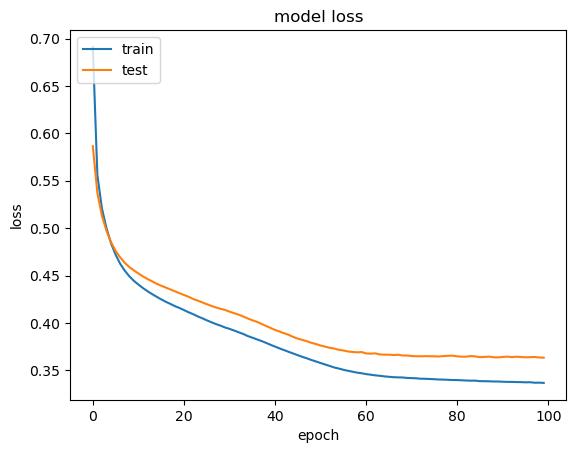

In [37]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [40]:
cm

array([[1514,   81],
       [ 205,  200]], dtype=int64)

In [41]:
score

0.857